In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsRegressor

In [3]:
A=pd.read_csv('prima-indians-diabetes.csv', header= None)
A.columns=['Preg', 'Glu', 'Bp', 'Sft', 'Ins','Bmi', 'Bpf', 'Age', 'Class']

In [4]:
x= A.drop(columns= ['Class'])
y= A['Class']

In [5]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [6]:
scaler = StandardScaler()  
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)  
xtest = scaler.transform(xtest) 

In [7]:
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(xtrain, ytrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [8]:
predict = classifier.predict(xtest)  


In [10]:
print(confusion_matrix(ytest,predict))  
print(classification_report(ytest, predict))

[[138   8]
 [ 37  48]]
             precision    recall  f1-score   support

          0       0.79      0.95      0.86       146
          1       0.86      0.56      0.68        85

avg / total       0.81      0.81      0.79       231



In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

Text(0,0.5,'Mean Error')

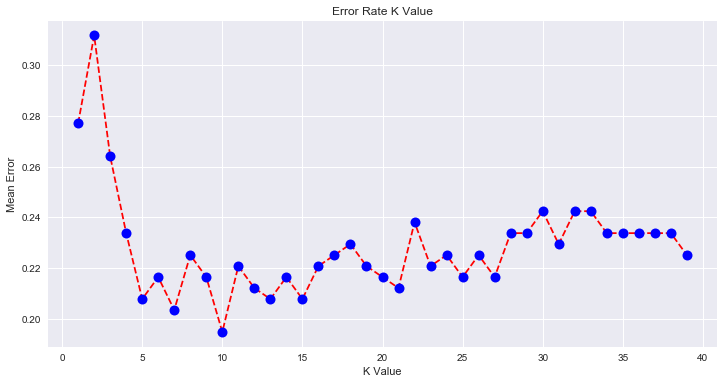

In [12]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [19]:
a= confusion_matrix(ytest,predict)
a

array([[138,   8],
       [ 37,  48]], dtype=int64)

In [23]:
acc_test=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    a= pd.crosstab(ytest, pred_i)
    acc= (a[0][0]+a[1][1])/len(xtest)
    acc_test.append(acc)

    

Text(0,0.5,'accuracy')

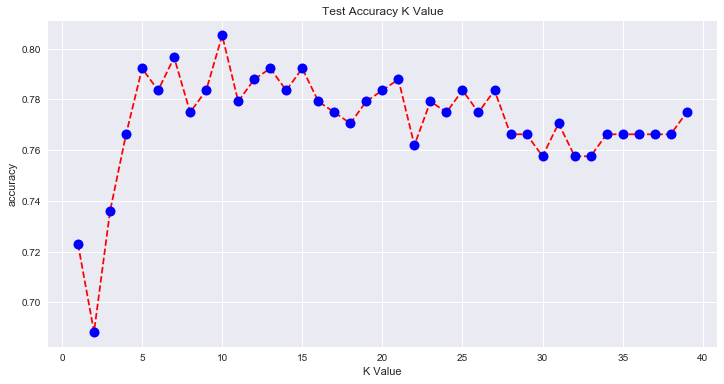

In [24]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), acc_test, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Test Accuracy K Value')  
plt.xlabel('K Value')  
plt.ylabel('accuracy')  

In [20]:
print(pd.crosstab(ytest, predict))

col_0    0   1
Class         
0      138   8
1       37  48
